In [1]:
import random
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message="overflow encountered in exp")


class Perceptron:
    """
    Represents a single-layer perceptron with various activation functions.
    """
    def __init__(self, bias, weights, learning_rate, activation_function):
        """
        Initializes the perceptron with given parameters.

        Args:
            bias (float): The bias value for the perceptron.
            weights (numpy.ndarray): The weight vector for the perceptron.
            learning_rate (float): The learning rate for weight updates during training.
            activation_function (callable): The activation function to use (e.g., step_function, sigmoid, relu).
        """
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.weights = weights
        self.bias = bias

    def sum(self, x):
        """
        Calculates the weighted sum of inputs plus the bias.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            float: The weighted sum.
        """
        return np.dot(self.weights, x) + self.bias

    def cost(self, predicted, actual):
        """
        Calculates the squared error cost between the predicted and actual output.

        Args:
            predicted (float): The predicted output.
            actual (float): The actual output.

        Returns:
            float: The squared error cost.
        """
        return (predicted - actual) ** 2

    def gradient(self, predicted, actual):
        """
        Calculates the gradient of the cost function with respect to the predicted output.

        Args:
            predicted (float): The predicted output.
            actual (float): The actual output.

        Returns:
            float: The gradient of the cost function.
        """
        der = self.activation_function(predicted, derivative=True)
        if der == 0:
            return 2 * (predicted - actual)
        return 2 * (predicted - actual) * der

    def train(self, x, y):
        """
        Trains the perceptron on a single training example.

        Args:
            x (numpy.ndarray): The input vector.
            y (float): The actual output.

        Returns:
            float: The cost for the current training example.
        """
        y_pred = self.predict(x)
        gradient = self.gradient(y_pred, y)
        self.weights -= self.learning_rate * gradient * x
        self.bias -= self.learning_rate * gradient
        return self.cost(y_pred, y)

    def predict(self, x):
        """
        Predicts the output for a given input vector.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            float: The predicted output.
        """
        return round(self.activation_function(self.sum(x)), 7)


def step_function(x, derivative=False):
    """
    The step activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the step function (or its derivative).
    """
    if derivative:
        return 0
    return 1 if x > 0 else 0


def relu(x, derivative=False):
    """
    The ReLU (Rectified Linear Unit) activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the ReLU function (or its derivative).
    """
    if derivative:
        return 1 if x > 0 else 0
    return max(0, x)


def bipolar(x, derivative=False):
    """
    The bipolar activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the bipolar function (or its derivative).
    """
    if derivative:
        return 0
    return 1 if x > 0 else -1


def sigmoid(x, derivative=False):
    """
    The sigmoid activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the sigmoid function (or its derivative).
    """
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))


def tanh(x, derivative=False):
    """
    The tanh (hyperbolic tangent) activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the tanh function (or its derivative).
    """
    if derivative:
        return 1 - np.tanh(x) ** 2
    return np.tanh(x)


def leaky_relu(x, k, derivative=False):
    """
    The Leaky ReLU activation function.

    Args:
        x (float): The input value.
        k (float): The slope for negative input values.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the Leaky ReLU function (or its derivative).
    """
    if derivative:
        return 1 if x > 0 else k
    return x if x > 0 else k * x

In [2]:
def train_perceptron(perceptron, df):
    """
    Trains a perceptron model on the given DataFrame.

    Args:
        perceptron (Perceptron): The perceptron object to train.
        df (pandas.DataFrame): The DataFrame containing training data with features and target variable.

    Returns:
        tuple: A tuple containing the number of epochs trained and a list of errors at each epoch.
    """
    i = 0
    errors = []
    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    for j in range(1000):  # Maximum number of epochs
        i += 1
        pdf = pd.DataFrame(columns=[*feature_columns, target_column, "Y"])  # DataFrame to store predictions for each epoch
        for index, row in df.iterrows():
            x = np.array([row[col] for col in feature_columns])  # Input features
            y_pred = perceptron.predict(x)  # Predict output
            pdf.loc[index] = {**{col: row[col] for col in feature_columns}, target_column: row[target_column], "Y": y_pred}  # Store prediction

        err = 0
        for index, row in df.iterrows():
            x = np.array([row[col] for col in feature_columns])  # Input features
            y = row[target_column]  # Target output
            err += perceptron.train(x, y)  # Train perceptron and accumulate error

        errors.append(err)

        # Check for convergence based on error threshold
        if hasattr(perceptron, "bias"):  # Check if perceptron has a single bias value
            if err <= 0.002:
                print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.bias)
                break
        else:  # Perceptron might have multiple biases (e.g., in a multi-layer perceptron)
            if np.all(err <= 0.002):
                print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.biases)
                break
    else:  # If the loop completes without breaking (not converged)
        if hasattr(perceptron, "bias"):
            print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.bias)
        else:
            print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.biases)

    return i, errors

After 68 epochs Weights: [0.2  0.15] Bias: -0.2999999999999812


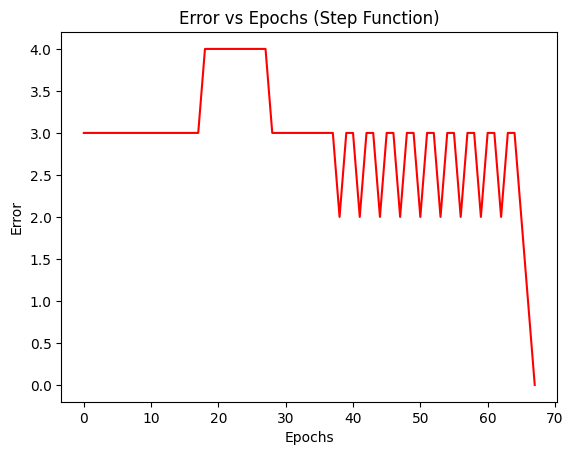

In [19]:
initial_bias = 10
initial_weights = np.array([0.2, -0.75])
learning_rate = 0.05
perceptron = Perceptron(initial_bias, initial_weights, learning_rate, step_function)

and_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
})

ni, errors = train_perceptron(perceptron, and_gate)

import matplotlib.pyplot as plt

plt.plot(errors, color="red")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Step Function)")
plt.show()